In [1]:
from PIL import Image
import numpy as np

In [2]:
def resize_crop(img, w, h):
    """
    Scaling, centering and cropping the image 
    to the specified size (w, h)
    """
    img_w, img_h = img.size
    ratio = img_w / img_h
    if ratio > (w / h):
        new_w = int(h * ratio)
        img = img.resize((new_w, h))
        crop_x = round(new_w / 2 - w / 2)
        img = img.crop((crop_x, 0, crop_x + w, h))
    else:
        new_h = int(w / ratio)
        img = img.resize((w, new_h))
        crop_y = round(new_h / 2 - h / 2)
        img = img.crop((0, crop_y, w, crop_y + h))
    return img

In [20]:
def correct_filename(filename, default='bmp'):
    """
    Verify that the filename is valid:
    - if there is no extension in the end of the 
      filename, the default extension will be added;
    - if filename has unsupported extension, it will
      be replaced by the default extension.
    """
    # Set of all supported by PIL extensions
    supported = {ex[1:] for ex, f 
                 in Image.registered_extensions().items() 
                 if f in Image.SAVE}

    sep = filename.split('.')
    if len(sep) == 1 or sep[-1] not in supported:
        # If there is no extension or it is unsupported
        return f'{filename}.{default}'
    else:
        # If filename is valid
        return filename

In [22]:
def open_img(image_name):
    """
    image_name can be represented as a str (path to image)
    or as an Image.Image object
    """
    if isinstance(image_name, str):
        return Image.open(image_name)
    elif isinstance(image_name, Image.Image):
        return image_name
    else:
        assert False, 'Image must be defined as str or Image!'

In [23]:
def hide(source_img, 
         secret_img, 
         save_as=None, 
         visibility=2):
    # Check visibility value
    assert visibility in [*range(1, 8)], 'visibility must be int from 1 to 7!'
    
    # Loading images
    source = open_img(source_img)
    secret = resize_crop(open_img(secret_img), 
                         *source.size)

    # Hiding secret in source
    source = np.array(source) >> visibility << visibility
    secret = np.array(secret) >> (8 - visibility)
    result_img = Image.fromarray(source + secret)

    # Saving the result if necessary
    if isinstance(save_as, str):
        filename = correct_filename(save_as)
        result_img.save(f'{filename}')
        print(f'The result was saved in {filename}')

    return result_img

In [24]:
def unhide(image, 
           save_as=None, 
           visibility=2):
    # Check visibility value
    assert visibility in [*range(1, 8)], 'visibility must be int from 1 to 7!'
    
    # Open and unhide
    hidden = np.array(open_img(image)) << (8 - visibility)
    hidden_img = Image.fromarray(hidden)

    # Saving the result if necessary
    if isinstance(save_as, str):
        filename = correct_filename(save_as)
        hidden_img.save(f'{filename}')
        print(f'The result was saved in {filename}')

    return hidden_img

In [18]:
def concat_img(*images):
    w, h = images[0].size
    result = Image.new('RGBA', (w * len(images), h))
    for i, img in enumerate(images):
        result.paste(resize_crop(img, w, h), (w * i, 0))
    return result

The result was saved in test/kek.png


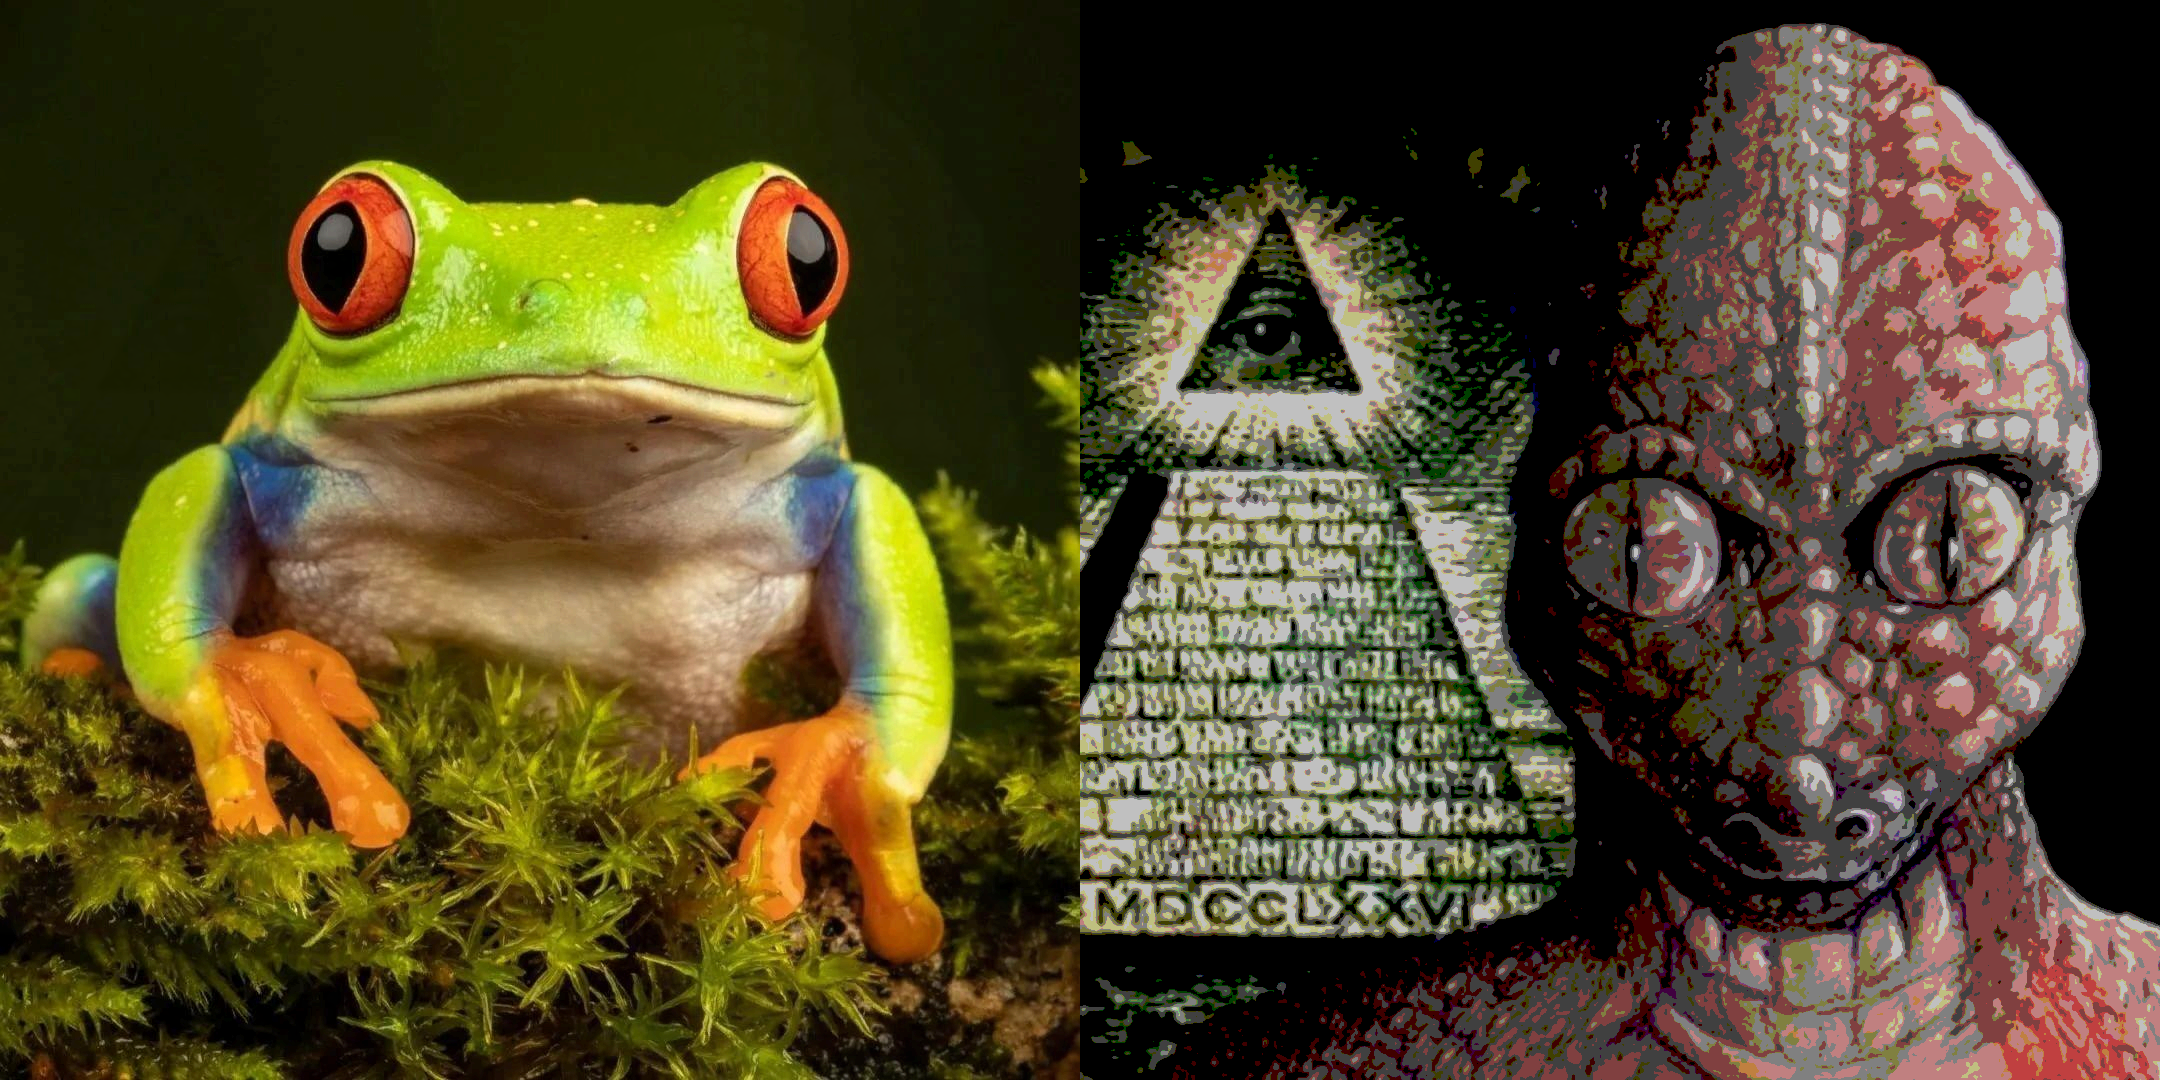

In [27]:
source = Image.open('images/frog.jpg')
secret = Image.open('images/secret.jpg')

result = hide(source, secret, 'test/kek.png', 2)
hidden = unhide('test/kek.png')

concat_img(
    # source, secret, 
    result, hidden)

CPU times: user 23.5 ms, sys: 20.5 ms, total: 43.9 ms
Wall time: 59.7 ms


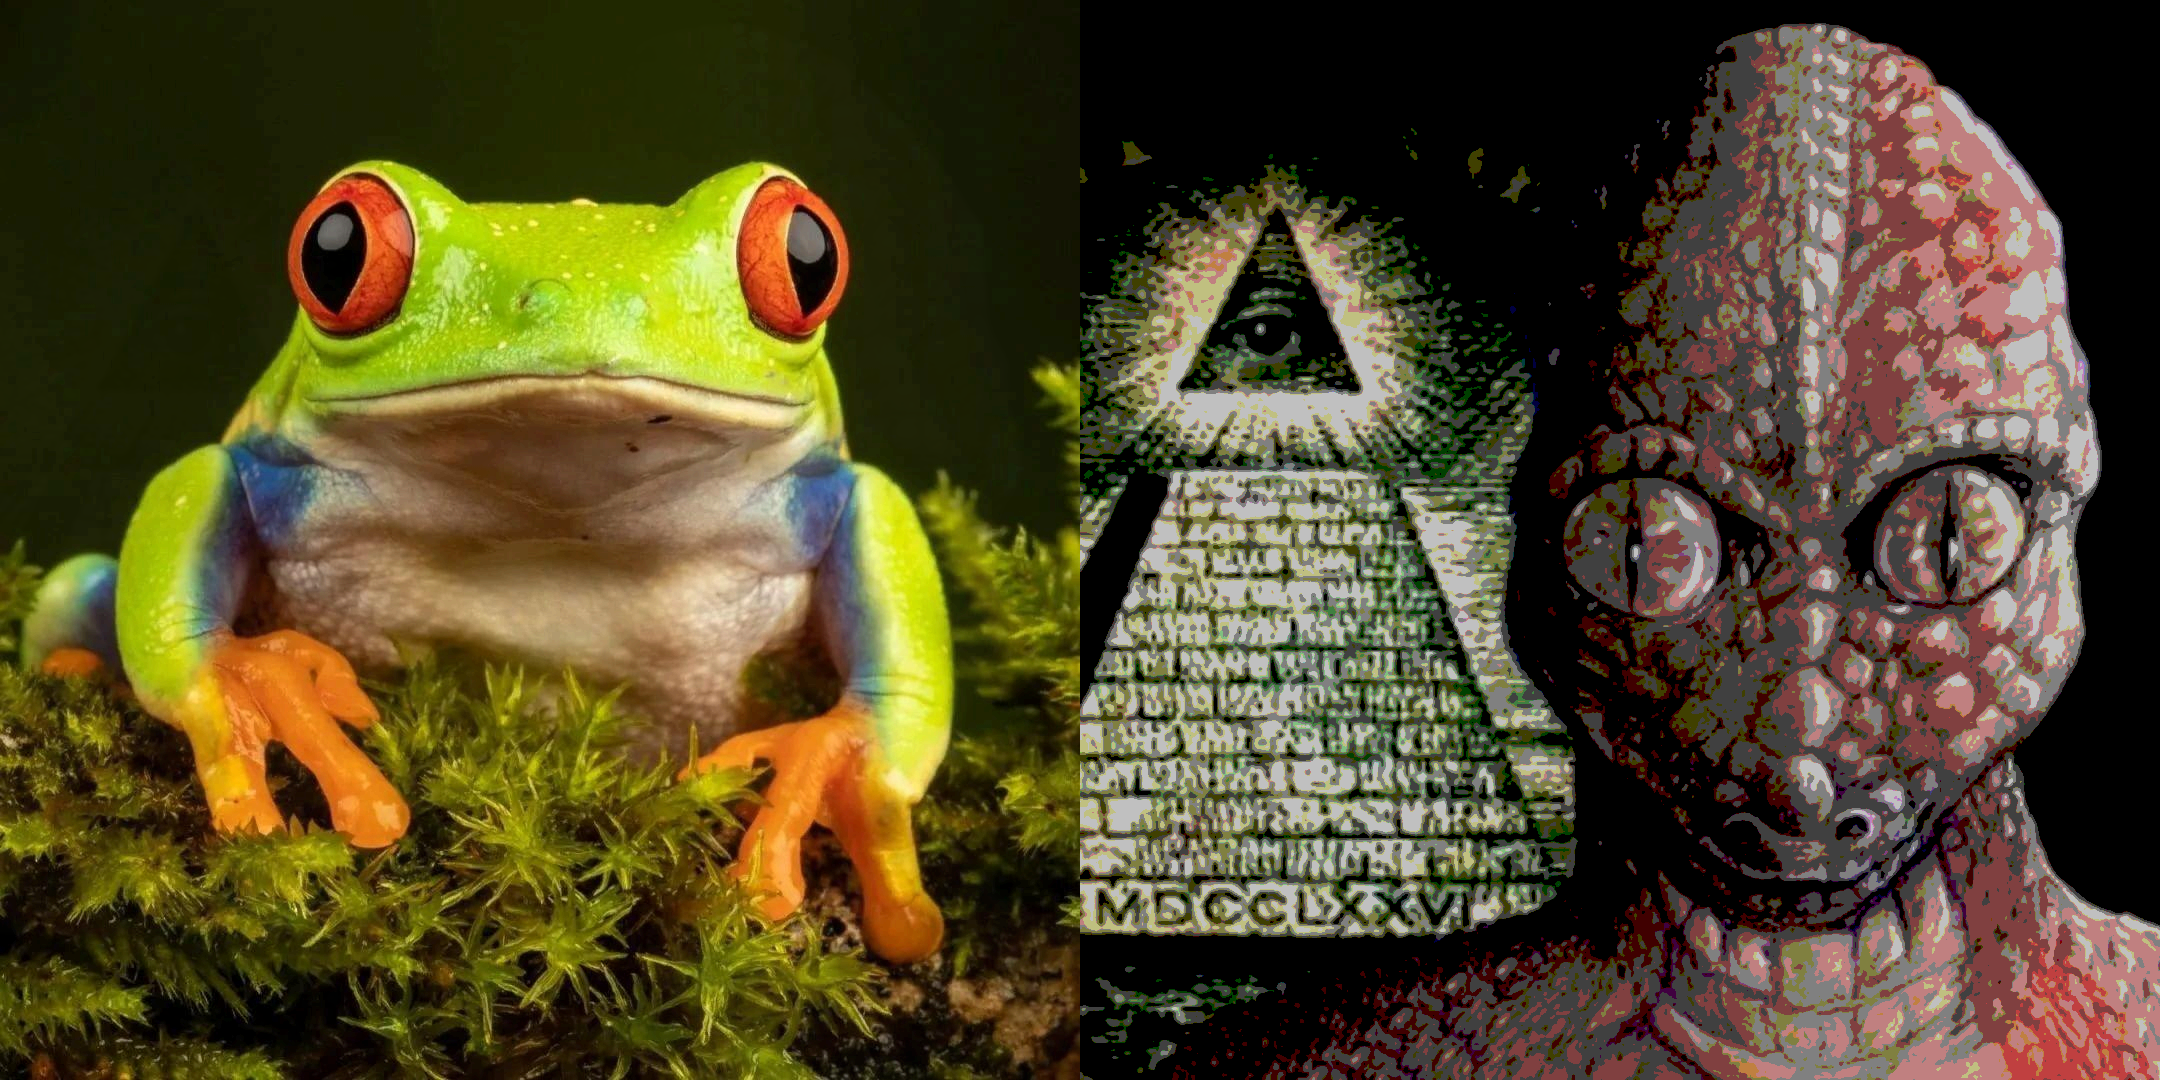

In [9]:
%%time

visibility = 2

# Clip the visibility
if visibility not in [*range(1, 8)]:
    visibility = np.clip(visibility, 1, 7)
    print(f'Incorrect visibility changed to {visibility}')

# Convert to np-arrays
img1_np = np.array(img1)
img2_np = np.array(img2)

# Hiding
img1_np = img1_np >> visibility << visibility
img2_np = img2_np >> (8 - visibility)
result = img1_np + img2_np

# Unhiding
hided = result << (8 - visibility)

# Show results
concat_img(Image.fromarray(result), 
           Image.fromarray(hided))